In [23]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import mplfinance as mpf
import matplotlib.dates as mdates
import plotly.graph_objects as go
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State
import streamlit as st
import random


In [2]:
# Anzahl der angezeigten Reihen auf 70 erhöhen
pd.set_option('display.max_rows', 70)


In [3]:
# Request historical data for past 7 days
data = yf.Ticker("NVDA").history(period='7d', interval='5m')
# Show info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 546 entries, 2025-02-06 09:30:00-05:00 to 2025-02-14 15:55:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          546 non-null    float64
 1   High          546 non-null    float64
 2   Low           546 non-null    float64
 3   Close         546 non-null    float64
 4   Volume        546 non-null    int64  
 5   Dividends     546 non-null    float64
 6   Stock Splits  546 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 34.1 KB
None


In [4]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2025-02-06 09:30:00-05:00,127.419998,127.500000,126.230003,126.256203,24502626,0.0,0.0
2025-02-06 09:35:00-05:00,126.250000,126.480003,125.209999,125.855003,7780087,0.0,0.0
2025-02-06 09:40:00-05:00,125.861900,126.000000,125.230003,125.665001,4679595,0.0,0.0
2025-02-06 09:45:00-05:00,125.669998,126.500000,125.669998,126.275002,6096378,0.0,0.0
2025-02-06 09:50:00-05:00,126.279999,127.019997,125.959999,126.749901,4846489,0.0,0.0


Branche: Technology
Herkunftsland: United States


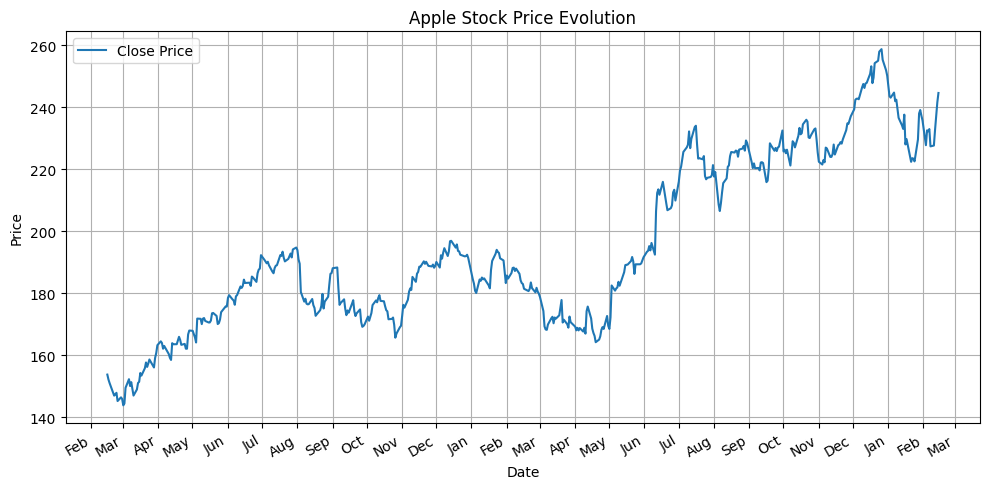

In [5]:
# Lade historische Daten für Apple
apple = yf.Ticker("AAPL")
hist = apple.history(period="2y")

# Abrufen der Unternehmensinformationen
info = apple.info

# Anzeigen der Branche und des Herkunftslandes
print("Branche:", info.get('sector'))
print("Herkunftsland:", info.get('country'))

# Erstelle das Diagramm
plt.figure(figsize=(10, 5))
plt.plot(hist.index, hist['Close'], label='Close Price')

# Setze die X-Achse auf monatliche Intervalle
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Rotieren der Monatskürzel für bessere Lesbarkeit
plt.gcf().autofmt_xdate()

# Beschriftungen und Titel
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple Stock Price Evolution')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Zeige das Diagramm an
plt.show()

In [6]:
apple.info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '(408) 996-1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryKey': 'consumer-electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and p

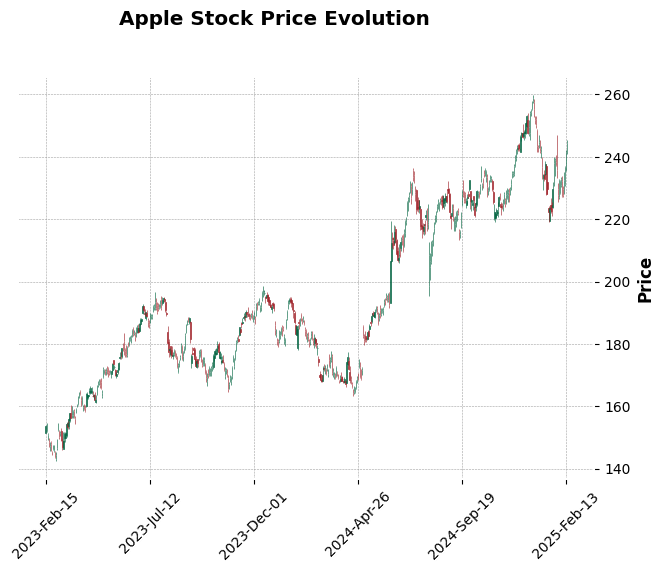

In [7]:
# Plot the candlestick chart
mpf.plot(hist, type='candle', style='charles', title='Apple Stock Price Evolution', ylabel='Price')


In [8]:

def plot_stock_evolution(ticker_symbol):
    # Lade historische Daten für das angegebene Unternehmen
    ticker = yf.Ticker(ticker_symbol)
    hist = ticker.history(period="2y")

    # Abrufen der Unternehmensinformationen
    info = ticker.info

    # Anzeigen der Branche und des Herkunftslandes
    print("Branche:", info.get('sector'))
    print("Herkunftsland:", info.get('country'))

    # Erstelle das Diagramm
    plt.figure(figsize=(10, 5))
    plt.plot(hist.index, hist['Close'], label='Close Price')

    # Setze die X-Achse auf monatliche Intervalle
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

    # Rotieren der Monatskürzel für bessere Lesbarkeit
    plt.gcf().autofmt_xdate()

    # Beschriftungen und Titel
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'{info.get("shortName")} Stock Price Evolution')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Zeige das Diagramm an
    plt.show()

Branche: Consumer Cyclical
Herkunftsland: United States


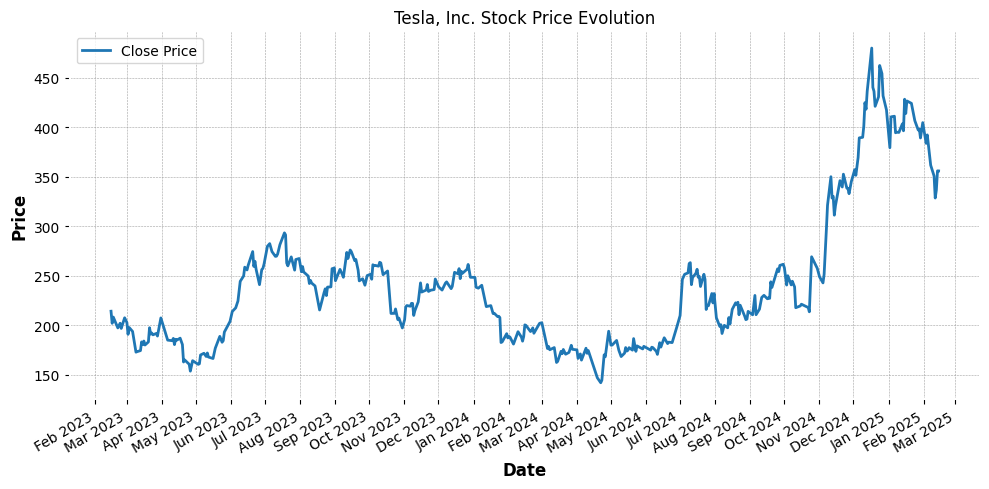

In [9]:
plot_stock_evolution("TSLA")

In [10]:
ticker = yf.Ticker('AAPL')
balance_sheet = ticker.balancesheet
balance_sheet.head(70)

,2024-09-30,2023-09-30,2022-09-30,2021-09-30,2020-09-30
Treasury Shares Number,NaN,0.0,NaN,NaN,NaN
Ordinary Shares Number,15116786000.0,15550061000.0,15943425000.0,16426786000.0,NaN
Share Issued,15116786000.0,15550061000.0,15943425000.0,16426786000.0,NaN
Net Debt,76686000000.0,81123000000.0,96423000000.0,89779000000.0,NaN
Total Debt,106629000000.0,111088000000.0,132480000000.0,136522000000.0,NaN
Tangible Book Value,56950000000.0,62146000000.0,50672000000.0,63090000000.0,NaN
Invested Capital,163579000000.0,173234000000.0,170741000000.0,187809000000.0,NaN
Working Capital,-23405000000.0,-1742000000.0,-18577000000.0,9355000000.0,NaN
Net Tangible Assets,56950000000.0,62146000000.0,50672000000.0,63090000000.0,NaN
Capital Lease Obligations,NaN,12842000000.0,12411000000.0,11803000000.0,9842000000.0


- **Treasury Shares Number**: Anzahl der eigenen Aktien
- **Ordinary Shares Number**: Anzahl der Stammaktien
- **Share Issued**: Ausgegebene Aktien
- **Net Debt**: Nettoverschuldung
- **Total Debt**: Gesamtschulden
- **Tangible Book Value**: Materieller Buchwert
- **Invested Capital**: Investiertes Kapital
- **Working Capital**: Betriebskapital
- **Net Tangible Assets**: Netto-Sachanlagen
- **Capital Lease Obligations**: Kapitalleasingverpflichtungen
- **Common Stock Equity**: Eigenkapital aus Stammaktien
- **Total Capitalization**: Gesamtkapitalisierung
- **Total Equity Gross Minority Interest**: Gesamteigenkapital einschließlich Minderheitsanteile
- **Stockholders Equity**: Eigenkapital der Aktionäre
- **Gains Losses Not Affecting Retained Earnings**: Gewinne/Verluste, die das einbehaltene Ergebnis nicht beeinflussen
- **Other Equity Adjustments**: Andere Eigenkapitalanpassungen
- **Retained Earnings**: Einbehaltene Gewinne
- **Capital Stock**: Grundkapital
- **Common Stock**: Stammaktien
- **Total Liabilities Net Minority Interest**: Gesamtschulden abzüglich Minderheitsanteile
- **Total Non Current Liabilities Net Minority Interest**: Langfristige Verbindlichkeiten abzüglich Minderheitsanteile
- **Other Non Current Liabilities**: Andere langfristige Verbindlichkeiten
- **Trade and Other Payables Non Current**: Langfristige Verbindlichkeiten aus Lieferungen und Leistungen
- **Long Term Debt And Capital Lease Obligation**: Langfristige Schulden und Kapitalleasingverpflichtungen
- **Long Term Capital Lease Obligation**: Langfristige Kapitalleasingverpflichtungen
- **Long Term Debt**: Langfristige Schulden
- **Current Liabilities**: Kurzfristige Verbindlichkeiten
- **Other Current Liabilities**: Andere kurzfristige Verbindlichkeiten
- **Current Deferred Liabilities**: Kurzfristige abgegrenzte Verbindlichkeiten
- **Current Deferred Revenue**: Kurzfristige abgegrenzte Einnahmen
- **Current Debt And Capital Lease Obligation**: Kurzfristige Schulden und Kapitalleasingverpflichtungen
- **Current Capital Lease Obligation**: Kurzfristige Kapitalleasingverpflichtungen
- **Current Debt**: Kurzfristige Schulden
- **Other Current Borrowings**: Andere kurzfristige Kredite
- **Commercial Paper**: Handelspapiere
- **Payables And Accrued Expenses**: Verbindlichkeiten und aufgelaufene Ausgaben
- **Payables**: Verbindlichkeiten
- **Total Tax Payable**: Gesamtsteuerverbindlichkeiten
- **Income Tax Payable**: Einkommensteuerverbindlichkeiten
- **Accounts Payable**: Verbindlichkeiten aus Lieferungen und Leistungen
- **Total Assets**: Gesamtvermögen
- **Total Non Current Assets**: Langfristige Vermögenswerte
- **Other Non Current Assets**: Andere langfristige Vermögenswerte
- **Non Current Deferred Assets**: Langfristige abgegrenzte Vermögenswerte
- **Non Current Deferred Taxes Assets**: Langfristige abgegrenzte Steuerforderungen
- **Investments And Advances**: Investitionen und Vorschüsse
- **Other Investments**: Andere Investitionen
- **Investment in Financial Assets**: Investitionen in Finanzanlagen
- **Available For Sale Securities**: Zur Veräußerung verfügbare Wertpapiere
- **Net PPE**: Netto-Sachanlagen
- **Accumulated Depreciation**: Kumulierte Abschreibungen
- **Gross PPE**: Brutto-Sachanlagen
- **Leases**: Leasingverträge
- **Other Properties**: Andere Immobilien
- **Machinery Furniture Equipment**: Maschinen, Möbel, Ausrüstung
- **Land And Improvements**: Grundstücke und Verbesserungen
- **Properties**: Immobilien
- **Current Assets**: Umlaufvermögen
- **Other Current Assets**: Andere kurzfristige Vermögenswerte
- **Inventory**: Inventar
- **Receivables**: Forderungen
- **Other Receivables**: Andere Forderungen
- **Accounts Receivable**: Forderungen aus Lieferungen und Leistungen
- **Cash Cash Equivalents And Short Term Investments**: Kassenbestand, Zahlungsmitteläquivalente und kurzfristige Investitionen
- **Other Short Term Investments**: Andere kurzfristige Investitionen
- **Cash And Cash Equivalents**: Kassenbestand und Zahlungsmitteläquivalente
- **Cash Equivalents**: Zahlungsmitteläquivalente
- **Cash Financial**: Finanzielle Zahlungsmittel

1. **Total non-current Assets = Anlagevermögen**  
2. **Current Assets = Umlaufvermögen**  
    2.1 **Inventory = Inventar**  
    2.2 **Receivables = Forderungen**  
    2.3 **Cash Cash, Equivalents And Short Term Investments = Flüssige Mittel**  

1. **Stockholders' Equity = Eigenkapital**  
2. **Total Liabilities Net Minority Interest = Fremdkapital**  
    2.1 **Total Non Current Liabilities = langfristige Verbindlichkeiten**  
    2.2 **Current Liabilities = kurzfristige Verbindlichkeiten**  


In [11]:
balance_sheet.index

Index(['Treasury Shares Number', 'Ordinary Shares Number', 'Share Issued',
       'Net Debt', 'Total Debt', 'Tangible Book Value', 'Invested Capital',
       'Working Capital', 'Net Tangible Assets', 'Capital Lease Obligations',
       'Common Stock Equity', 'Total Capitalization',
       'Total Equity Gross Minority Interest', 'Stockholders Equity',
       'Gains Losses Not Affecting Retained Earnings',
       'Other Equity Adjustments', 'Retained Earnings', 'Capital Stock',
       'Common Stock', 'Total Liabilities Net Minority Interest',
       'Total Non Current Liabilities Net Minority Interest',
       'Other Non Current Liabilities', 'Tradeand Other Payables Non Current',
       'Long Term Debt And Capital Lease Obligation',
       'Long Term Capital Lease Obligation', 'Long Term Debt',
       'Current Liabilities', 'Other Current Liabilities',
       'Current Deferred Liabilities', 'Current Deferred Revenue',
       'Current Debt And Capital Lease Obligation',
       'Current C

In [12]:
balance_sheet.columns

DatetimeIndex(['2024-09-30', '2023-09-30', '2022-09-30', '2021-09-30',
               '2020-09-30'],
              dtype='datetime64[ns]', freq=None)

In [13]:
def get_company_info(symbols):
    """
    Ruft die Unternehmensinformationen für eine Liste von Symbolen ab.
    
    Args:
    symbols (list): Liste der Unternehmenssymbole.
    
    Returns:
    dict: Ein Dictionary mit den Unternehmensinformationen.
    """
    return {symbol: yf.Ticker(symbol).info for symbol in symbols}

In [14]:
def create_company_table(symbols):
    """
    Erstellt eine Tabelle mit den Unternehmensinformationen.
    
    Args:
    symbols (list): Liste der Unternehmenssymbole.
    
    Returns:
    plotly.graph_objects.Figure: Eine Plotly-Figur mit der Tabelle.
    """
    data = get_company_info(symbols)
    
    namen = [data[symbol].get('shortName', 'N/A') for symbol in data]
    branchen = [data[symbol].get('sector', 'N/A') for symbol in data]
    länder = [data[symbol].get('country', 'N/A') for symbol in data]
    mitarbeiter = [data[symbol].get('fullTimeEmployees', 'N/A') for symbol in data]

    fig = go.Figure(data=[go.Table(
        header=dict(values=['Unternehmen', 'Branche', 'Land', 'Mitarbeiter'],
                    fill_color='paleturquoise',
                    align='left'),
        cells=dict(values=[namen, branchen, länder, mitarbeiter],
                   fill_color='lavender',
                   align='left'))
    ])
    
    return fig

In [15]:
# Unternehmen, für die Daten abgerufen werden sollen
unternehmen = ['AAPL', 'MSFT', 'GOOGL']

# Erstellen und Anzeigen der Tabelle
fig = create_company_table(unternehmen)
fig.show()

In [16]:
# Definierte Indices
indices = [
    'Total Non Current Assets', 'Current Assets', 'Inventory', 'Receivables',
    'Cash Cash Equivalents And Short Term Investments', 'Stockholders Equity',
    'Total Liabilities Net Minority Interest', 'Current Liabilities',
    'Total Non Current Liabilities Net Minority Interest'
]

def get_filtered_balance_sheet(ticker_symbol):
    # Lade die Bilanzdaten für das angegebene Unternehmen
    ticker = yf.Ticker(ticker_symbol)
    balance_sheet = ticker.balancesheet
    
    # Abrufen der Unternehmensinformationen
    info = ticker.info
    company_name = info.get('shortName', 'Unknown Company')
    
    # Anzeigen des Unternehmensnamens und der Bilanzdaten
    print(f"Bilanzdaten für {company_name} ({ticker_symbol}):")
    
    # Filtern der gewünschten Zeilen
    filtered_balance_sheet = balance_sheet.loc[indices]

    # Spaltennamen kürzen, sodass nur das Jahr angezeigt wird
    filtered_balance_sheet.columns = filtered_balance_sheet.columns.astype(str).str[:4]
    
    return filtered_balance_sheet

In [ ]:
def get_usd_to_eur_exchange_rate():
    # Abrufen der Daten für das Währungspaar USD/EUR
    ticker = yf.Ticker("USDEUR=X")
    exchange_rate = ticker.history(period="1d")['Close'].iloc[-1]
    return exchange_rate

In [ ]:
def convert_dataframe_to_euro(df):
    # Funktion zur Umrechnung in Euro
    def convert_to_euro(value):
        return value * get_usd_to_eur_exchange_rate()
    
    # Anwendung der Umrechnung auf alle Spalten des DataFrames
    df_euro = df.applymap(convert_to_euro)
    
    return df_euro


In [ ]:
def calculate_kpis(df):
    # Berechnung der Eigenkapitalquote
    df.loc['Equity_Ratio'] = df.loc['Stockholders Equity'] / (df.loc['Stockholders Equity'] + df.loc['Total Liabilities Net Minority Interest'])
    
    # Berechnung der Fremdkapitalquote
    df.loc['Debt_Ratio'] = df.loc['Total Liabilities Net Minority Interest'] / (df.loc['Stockholders Equity'] + df.loc['Total Liabilities Net Minority Interest'])

    # Berechnung des statischen Verschuldungsgrads
    df.loc['Static_Debt_Ratio'] = df.loc['Total Liabilities Net Minority Interest'] / df.loc['Stockholders Equity']
    
    # Berechnung der Anlageintensität
    df.loc['Fixed_Asset_Intensity'] = df.loc['Total Non Current Assets'] / (df.loc['Current Assets'] + df.loc['Total Non Current Assets'])
    
    # Berechnung der Umlaufquote
    df.loc['Current_Asset_Ratio'] = df.loc['Current Assets'] / (df.loc['Current Assets'] + df.loc['Total Non Current Assets'])
    
    # Berechnung der Forderungsquote
    df.loc['Receivables_Ratio'] = df.loc['Receivables'] / (df.loc['Current Assets'] + df.loc['Total Non Current Assets'])

    # Berechnung des 1. Liquiditätsgrad
    df.loc['1. Liquidity_Ratio'] = df.loc['Current Assets'] / df.loc['Current Liabilities']
    
    # Berechnung des Net Working Capital
    df.loc['Net_Working_Capital'] = df.loc['Current Assets'] - df.loc['Current Liabilities']
    
    return df

In [ ]:
def translate_indices(df):
    # Übersetzung der englischen Indizes ins Deutsche
    translations = {
        'Total Non Current Assets': 'Gesamtanlagevermögen',
        'Current Assets': 'Umlaufvermögen',
        'Receivables': 'Forderungen',
        'Stockholders Equity': 'Eigenkapital',
        'Total Liabilities Net Minority Interest': 'Gesamtverbindlichkeiten ohne Minderheitsanteile',
        'Current Liabilities': 'Kurzfristige Verbindlichkeiten',
        'Total Non Current Liabilities Net Minority Interest': 'Langfristige Verbindlichkeiten',
        'Equity_Ratio': 'Eigenkapitalquote',
        'Debt_Ratio': 'Verschuldungsquote',
        'Static_Debt_Ratio': 'Statischer Verschuldungsgrad',
        'Fixed_Asset_Intensity': 'Anlageintensität',
        'Current_Asset_Ratio': 'Umlaufquote',
        'Receivables_Ratio': 'Forderungsquote',
        '1. Liquidity_Ratio': '1. Liquiditätsquote',
        'Net_Working_Capital': 'Netto-Umlaufvermögen'
    }
    
    # Übersetzung der Indizes
    df.rename(index=translations, inplace=True)
    
    return df

In [ ]:
def get_balance_sheet(ticker_symbol):
    
    # Lade die gefilterten Bilanzdaten für das gewünschte Unternehmen
    balance_sheet = get_filtered_balance_sheet(ticker_symbol)
    
    # Umrechnung der Werte von Dollar in Euro
    balance_sheet_euro = convert_dataframe_to_euro(balance_sheet)

    # Berchnene der KPIs für das Unternehmen
    balance_sheet_kpi = calculate_kpis(balance_sheet_euro)

    # Übersetzen der Indices in Deutsch
    balance_sheet_german = translate_indices(balance_sheet_kpi)
    
    return balance_sheet_german

In [ ]:
def create_dashboard(ticker_symbols):
    balance_sheets = {}

    # Erstellen eines Dashboards für gegebene Unternehmen
    for ticker in ticker_symbols:
        balance_sheets[f'{ticker}'] = get_balance_sheet(ticker)

    # Erstellen des Dashboards
    fig = go.Figure()

    # Farben für die Balken festlegen
    colors = {
        'Eigenkapital': 'blue',
        'Langfristige Verbindlichkeiten': 'red',
        'Kurzfristige Verbindlichkeiten': 'green'
    }

    # Hinzufügen von gestapelten Balkendiagramm-Daten zum Dashboard
    for ticker, balance_sheet in balance_sheets.items():
        total_2023 = balance_sheet.loc['Eigenkapital', '2023'] + balance_sheet.loc['Langfristige Verbindlichkeiten', '2023'] + balance_sheet.loc['Kurzfristige Verbindlichkeiten', '2023']
        total_2024 = balance_sheet.loc['Eigenkapital', '2024'] + balance_sheet.loc['Langfristige Verbindlichkeiten', '2024'] + balance_sheet.loc['Kurzfristige Verbindlichkeiten', '2024']

        fig.add_trace(go.Bar(
            x=[f'{ticker} 2023'],
            y=[balance_sheet.loc['Eigenkapital', '2023']],
            marker_color=colors['Eigenkapital'],
            hovertext=[f"{balance_sheet.loc['Eigenkapital', '2023'] / total_2023:.1%}"],
            hoverinfo='text',
            showlegend=False
        ))
        fig.add_trace(go.Bar(
            x=[f'{ticker} 2023'],
            y=[balance_sheet.loc['Langfristige Verbindlichkeiten', '2023']],
            marker_color=colors['Langfristige Verbindlichkeiten'],
            hovertext=[f"{balance_sheet.loc['Langfristige Verbindlichkeiten', '2023'] / total_2023:.1%}"],
            hoverinfo='text',
            showlegend=False
        ))
        fig.add_trace(go.Bar(
            x=[f'{ticker} 2023'],
            y=[balance_sheet.loc['Kurzfristige Verbindlichkeiten', '2023']],
            marker_color=colors['Kurzfristige Verbindlichkeiten'],
            hovertext=[f"{balance_sheet.loc['Kurzfristige Verbindlichkeiten', '2023'] / total_2023:.1%}"],
            hoverinfo='text',
            showlegend=False
        ))

        fig.add_trace(go.Bar(
            x=[f'{ticker} 2024'],
            y=[balance_sheet.loc['Eigenkapital', '2024']],
            marker_color=colors['Eigenkapital'],
            hovertext=[f"{balance_sheet.loc['Eigenkapital', '2024'] / total_2024:.1%}"],
            hoverinfo='text',
            showlegend=False
        ))
        fig.add_trace(go.Bar(
            x=[f'{ticker} 2024'],
            y=[balance_sheet.loc['Langfristige Verbindlichkeiten', '2024']],
            marker_color=colors['Langfristige Verbindlichkeiten'],
            hovertext=[f"{balance_sheet.loc['Langfristige Verbindlichkeiten', '2024'] / total_2024:.1%}"],
            hoverinfo='text',
            showlegend=False
        ))
        fig.add_trace(go.Bar(
            x=[f'{ticker} 2024'],
            y=[balance_sheet.loc['Kurzfristige Verbindlichkeiten', '2024']],
            marker_color=colors['Kurzfristige Verbindlichkeiten'],
            hovertext=[f"{balance_sheet.loc['Kurzfristige Verbindlichkeiten', '2024'] / total_2024:.1%}"],
            hoverinfo='text',
            showlegend=False
        ))

    # Legende separat hinzufügen
    fig.add_trace(go.Bar(
        x=[None],
        y=[None],
        name='Eigenkapital',
        marker_color=colors['Eigenkapital']
    ))
    fig.add_trace(go.Bar(
        x=[None],
        y=[None],
        name='Langfristige Verbindlichkeiten',
        marker_color=colors['Langfristige Verbindlichkeiten']
    ))
    fig.add_trace(go.Bar(
        x=[None],
        y=[None],
        name='Kurzfristige Verbindlichkeiten',
        marker_color=colors['Kurzfristige Verbindlichkeiten']
    ))

    # Layout anpassen für gestapeltes Balkendiagramm
    fig.update_layout(
        barmode='stack',
        title='Kapital und Verbindlichkeiten der Unternehmen (2023 vs 2024)',
        xaxis_title='Unternehmen und Jahr',
        yaxis_title='Betrag',
        legend_title='Komponenten',
        xaxis=dict(
            tickmode='array',
            tickvals=[f'{ticker} 2023' for ticker in ticker_symbols] + [f'{ticker} 2024' for ticker in ticker_symbols],
            ticktext=[f'2023\n{ticker}' for ticker in ticker_symbols] + [f'2024\n{ticker}' for ticker in ticker_symbols]
        )
    )

    # Dashboard anzeigen
    fig.show()

In [ ]:
# Beispielaufruf der Funktion
create_dashboard(['AAPL', 'MSFT', 'GOOGL'])


Bilanzdaten für Apple Inc. (AAPL):


C:\Users\halte\AppData\Local\Temp\ipykernel_16028\3001435398.py:7: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



Bilanzdaten für Microsoft Corporation (MSFT):


C:\Users\halte\AppData\Local\Temp\ipykernel_16028\3001435398.py:7: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



Bilanzdaten für Alphabet Inc. (GOOGL):


C:\Users\halte\AppData\Local\Temp\ipykernel_16028\3001435398.py:7: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [ ]:
def create_line_chart(ticker_symbols):
    balance_sheets = {}
    fig = go.Figure()

    # Erstellen eines Dashboards für gegebene Unternehmen
    for ticker in ticker_symbols:
        balance_sheets[f'{ticker}'] = get_balance_sheet(ticker)

    # Hinzufügen des Liniendiagramms für Verschuldungsquote und Eigenkapitalquote
    for ticker, balance_sheet in balance_sheets.items():
        fig.add_trace(go.Scatter(
            x=balance_sheet.columns,
            y=balance_sheet.loc['Verschuldungsquote'],
            mode='lines+markers',
            name=f'{ticker} Verschuldungsquote'
        ))
        fig.add_trace(go.Scatter(
            x=balance_sheet.columns,
            y=balance_sheet.loc['Eigenkapitalquote'],
            mode='lines+markers',
            name=f'{ticker} Eigenkapitalquote'
        ))

    # Layout anpassen für das Liniendiagramm
    fig.update_layout(
        title='Verlauf der Verschuldungsquote und Eigenkapitalquote',
        xaxis_title='Jahr',
        yaxis_title='Quote',
        legend_title='Komponenten'
    )

    fig.show()

In [ ]:

def generate_random_color():
    return "#{:06x}".format(random.randint(0, 0xFFFFFF))

def create_interactive_chart(ticker_symbols):
    balance_sheets = {}
    fig = go.Figure()

    # Farben für die Unternehmen festlegen
    company_colors = {ticker: generate_random_color() for ticker in ticker_symbols}

    # Erstellen eines Dashboards für gegebene Unternehmen
    for ticker in ticker_symbols:
        balance_sheets[f'{ticker}'] = get_balance_sheet(ticker)

    # Hinzufügen der Liniendiagramm-Daten für die Eigenkapitalquote
    for ticker, balance_sheet in balance_sheets.items():
        fig.add_trace(go.Scatter(
            x=balance_sheet.columns,
            y=balance_sheet.loc['Eigenkapitalquote'],
            mode='lines+markers',
            name=f'{ticker} Eigenkapitalquote',
            line=dict(color=company_colors[ticker]),
            visible=True
        ))

    # Hinzufügen der Liniendiagramm-Daten für die Verschuldungsquote
    for ticker, balance_sheet in balance_sheets.items():
        fig.add_trace(go.Scatter(
            x=balance_sheet.columns,
            y=balance_sheet.loc['Verschuldungsquote'],
            mode='lines+markers',
            name=f'{ticker} Verschuldungsquote',
            line=dict(color=company_colors[ticker]),
            visible=False
        ))

    # Layout anpassen für das interaktive Diagramm
    fig.update_layout(
        title='Eigenkapitalquote und Verschuldungsquote',
        xaxis_title='Jahr',
        yaxis_title='Quote',
        legend_title='Unternehmen',
        updatemenus=[
            {
                'buttons': [
                    {
                        'label': 'Eigenkapitalquote',
                        'method': 'update',
                        'args': [{'visible': [True if i < len(ticker_symbols) else False for i in range(2 * len(ticker_symbols))]},
                                 {'title': 'Eigenkapitalquote'}]
                    },
                    {
                        'label': 'Verschuldungsquote',
                        'method': 'update',
                        'args': [{'visible': [False if i < len(ticker_symbols) else True for i in range(2 * len(ticker_symbols))]},
                                 {'title': 'Verschuldungsquote'}]
                    }
                ],
                'direction': 'down',
                'showactive': True
            }
        ]
    )

    fig.show()

In [ ]:
create_interactive_chart(['AAPL', 'MSFT', 'GOOGL'])

Bilanzdaten für Apple Inc. (AAPL):


C:\Users\halte\AppData\Local\Temp\ipykernel_16028\3001435398.py:7: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



Bilanzdaten für Microsoft Corporation (MSFT):


C:\Users\halte\AppData\Local\Temp\ipykernel_16028\3001435398.py:7: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



Bilanzdaten für Alphabet Inc. (GOOGL):


C:\Users\halte\AppData\Local\Temp\ipykernel_16028\3001435398.py:7: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [ ]:
def concat_filtered_balance_sheets(ticker_symbols):
    balance_sheets = {}
    
    # Lade die gefilterten Bilanzdaten für jedes Unternehmen und speichere sie im Dictionary
    for ticker in ticker_symbols:
        balance_sheets[f'{ticker}'] = get_filtered_balance_sheet(ticker)
    
    # Umrechnung der Werte von Dollar in Euro
    for key, df in balance_sheets.items():
        balance_sheets[key] = convert_dataframe_to_euro(df)

    # Berchnene der KPIs für jedes Unternehmen
    for key, df in balance_sheets.items():
        balance_sheets[key] = calculate_kpis(df)

    # Übersetzen der Indices in Deutsch
    for key, df in balance_sheets.items():
        balance_sheets[key] = translate_indices(df)
        
    # Konkatinieren der DataFrames
    df_combined = pd.concat(balance_sheets.values(), keys=balance_sheets.keys(), names=['Company', 'Index'])
    
    return df_combined

In [ ]:
# Beispielaufruf
ticker_symbols = ['AAPL', 'MSFT']
df_combined = concat_filtered_balance_sheets(ticker_symbols)

df_combined.head(30)

Bilanzdaten für Apple Inc. (AAPL):
Bilanzdaten für Microsoft Corporation (MSFT):


C:\Users\halte\AppData\Local\Temp\ipykernel_16028\3001435398.py:7: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

C:\Users\halte\AppData\Local\Temp\ipykernel_16028\3001435398.py:7: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



2024  \
Company Index                                                            
AAPL    Gesamtanlagevermögen                              2.018809e+11   
        Umlaufvermögen                                    1.456895e+11   
        Inventory                                         6.938458e+09   
        Forderungen                                       6.308321e+10   
        Cash Cash Equivalents And Short Term Investments  6.206234e+10   
        Eigenkapital                                      5.423349e+10   
        Gesamtverbindlichkeiten ohne Minderheitsanteile   2.933370e+11   
        Kurzfristige Verbindlichkeiten                    1.679781e+11   
        Langfristige Verbindlichkeiten                    1.253589e+11   
        Eigenkapitalquote                                 1.560359e-01   
        Verschuldungsquote                                8.439641e-01   
        Statischer Verschuldungsgrad                      5.408780e+00   
        Anlageintensität                                  5.808346e-01   
        Umlaufquote                                       4.191654e-01   
        Forderungsquote                                   1.814976e-01   
        1. Liquiditätsquote                               8.673126e-01   
        Netto-Umlaufvermögen                             -2.228858e+10   
MSFT    Gesamtanlagevermögen                              3.356181e+11   
        Umlaufvermögen                                    1.521147e+11   
        Inventory                                         1.186566e+09   
        Forderungen                                       5.420873e+10   
        Cash Cash Equivalents And Short Term Investments  7.192817e+10   
        Eigenkapital                                      2.556707e+11   
        Gesamtverbindlichkeiten ohne Minderheitsanteile   2.320622e+11   
        Kurzfristige Verbindlichkeiten                    1.193099e+11   
        Langfristige Verbindlichkeiten                    1.127523e+11   
        Eigenkapitalquote                                 5.242023e-01   
        Verschuldungsquote                                4.757977e-01   
        Statischer Verschuldungsgrad                      9.076606e-01   
        Anlageintensität                                  6.881188e-01   

                                                                  2023  \
Company Index                                                            
AAPL    Gesamtanlagevermögen                              1.990469e+11   
        Umlaufvermögen                                    1.367179e+11   
        Inventory                                         6.029011e+09   
        Forderungen                                       5.807602e+10   
        Cash Cash Equivalents And Short Term Investments  5.861883e+10   
        Eigenkapital                                      5.918164e+10   
        Gesamtverbindlichkeiten ohne Minderheitsanteile   2.765832e+11   
        Kurzfristige Verbindlichkeiten                    1.383768e+11   
        Langfristige Verbindlichkeiten                    1.382063e+11   
        Eigenkapitalquote                                 1.762592e-01   
        Verschuldungsquote                                8.237408e-01   
        Statischer Verschuldungsgrad                      4.673462e+00   
        Anlageintensität                                  5.928164e-01   
        Umlaufquote                                       4.071836e-01   
        Forderungsquote                                   1.729664e-01   
        1. Liquiditätsquote                               9.880117e-01   
        Netto-Umlaufvermögen                             -1.658907e+09   
MSFT    Gesamtanlagevermögen                              2.168568e+11   
        Umlaufvermögen                                    1.754679e+11   
        Inventory                                         2.380750e+09   
        Forderungen                                       4.636558e+1

In [ ]:
from flask import Flask, render_template, request, jsonify
from flask_cors import CORS
import yfinance as yf
import plotly.graph_objects as go

app = Flask(__name__)
CORS(app)  # CORS für alle Routen aktivieren

def get_company_info(symbols):
    return {symbol: yf.Ticker(symbol).info for symbol in symbols}

def create_company_table(symbols):
    data = get_company_info(symbols)
    namen = [data[symbol].get('shortName', 'N/A') for symbol in data]
    branchen = [data[symbol].get('sector', 'N/A') for symbol in data]
    länder = [data[symbol].get('country', 'N/A') for symbol in data]
    mitarbeiter = [data[symbol].get('fullTimeEmployees', 'N/A') for symbol in data]

    fig = go.Figure(data=[go.Table(
        header=dict(values=['Unternehmen', 'Branche', 'Land', 'Mitarbeiter'],
                    fill_color='paleturquoise',
                    align='left'),
        cells=dict(values=[namen, branchen, länder, mitarbeiter],
                   fill_color='lavender',
                   align='left'))
    ])
    return fig

def get_filtered_balance_sheet(ticker_symbol):
    indices = [
        'Total Non Current Assets', 'Current Assets', 'Inventory', 'Receivables',
        'Cash Cash Equivalents And Short Term Investments', 'Stockholders Equity',
        'Total Liabilities Net Minority Interest', 'Current Liabilities',
        'Total Non Current Liabilities Net Minority Interest'
    ]
    ticker = yf.Ticker(ticker_symbol)
    balance_sheet = ticker.balancesheet
    filtered_balance_sheet = balance_sheet.loc[indices]
    filtered_balance_sheet.columns = filtered_balance_sheet.columns.astype(str).str[:4]
    return filtered_balance_sheet

def get_usd_to_eur_exchange_rate():
    ticker = yf.Ticker("USDEUR=X")
    exchange_rate = ticker.history(period="1d")['Close'].iloc[-1]
    return exchange_rate

def convert_dataframe_to_euro(df):
    exchange_rate = get_usd_to_eur_exchange_rate()
    df_euro = df.applymap(lambda value: value * exchange_rate)
    return df_euro

def calculate_kpis(df):
    df.loc['Equity_Ratio'] = df.loc['Stockholders Equity'] / (df.loc['Stockholders Equity'] + df.loc['Total Liabilities Net Minority Interest'])
    df.loc['Debt_Ratio'] = df.loc['Total Liabilities Net Minority Interest'] / (df.loc['Stockholders Equity'] + df.loc['Total Liabilities Net Minority Interest'])
    df.loc['Static_Debt_Ratio'] = df.loc['Total Liabilities Net Minority Interest'] / df.loc['Stockholders Equity']
    df.loc['Fixed_Asset_Intensity'] = df.loc['Total Non Current Assets'] / (df.loc['Current Assets'] + df.loc['Total Non Current Assets'])
    df.loc['Current_Asset_Ratio'] = df.loc['Current Assets'] / (df.loc['Current Assets'] + df.loc['Total Non Current Assets'])
    df.loc['Receivables_Ratio'] = df.loc['Receivables'] / (df.loc['Current Assets'] + df.loc['Total Non Current Assets'])
    df.loc['1. Liquidity_Ratio'] = df.loc['Current Assets'] / df.loc['Current Liabilities']
    df.loc['Net_Working_Capital'] = df.loc['Current Assets'] - df.loc['Current Liabilities']
    return df

def translate_indices(df):
    translations = {
        'Total Non Current Assets': 'Gesamtanlagevermögen',
        'Current Assets': 'Umlaufvermögen',
        'Receivables': 'Forderungen',
        'Stockholders Equity': 'Eigenkapital',
        'Total Liabilities Net Minority Interest': 'Gesamtverbindlichkeiten ohne Minderheitsanteile',
        'Current Liabilities': 'Kurzfristige Verbindlichkeiten',
        'Total Non Current Liabilities Net Minority Interest': 'Langfristige Verbindlichkeiten',
        'Equity_Ratio': 'Eigenkapitalquote',
        'Debt_Ratio': 'Verschuldungsquote',
        'Static_Debt_Ratio': 'Statischer Verschuldungsgrad',
        'Fixed_Asset_Intensity': 'Anlageintensität',
        'Current_Asset_Ratio': 'Umlaufquote',
        'Receivables_Ratio': 'Forderungsquote',
        '1. Liquidity_Ratio': '1. Liquiditätsquote',
        'Net_Working_Capital': 'Netto-Umlaufvermögen'
    }
    df.rename(index=translations, inplace=True)
    return df

def get_balance_sheet(ticker_symbol):
    balance_sheet = get_filtered_balance_sheet(ticker_symbol)
    balance_sheet_euro = convert_dataframe_to_euro(balance_sheet)
    balance_sheet_kpi = calculate_kpis(balance_sheet_euro)
    balance_sheet_german = translate_indices(balance_sheet_kpi)
    return balance_sheet_german

def is_valid_ticker(ticker_symbol):
    ticker = yf.Ticker(ticker_symbol)
    balance_sheet = ticker.balancesheet
    return not balance_sheet.empty

def create_dashboard(symbols):
    balance_sheets = {ticker: get_balance_sheet(ticker) for ticker in symbols}
    fig = go.Figure()
    colors = {
        'Eigenkapital': 'blue',
        'Langfristige Verbindlichkeiten': 'red',
        'Kurzfristige Verbindlichkeiten': 'green'
    }
    for ticker, balance_sheet in balance_sheets.items():
        total_2023 = balance_sheet.loc['Eigenkapital', '2023'] + balance_sheet.loc['Langfristige Verbindlichkeiten', '2023'] + balance_sheet.loc['Kurzfristige Verbindlichkeiten', '2023']
        total_2024 = balance_sheet.loc['Eigenkapital', '2024'] + balance_sheet.loc['Langfristige Verbindlichkeiten', '2024'] + balance_sheet.loc['Kurzfristige Verbindlichkeiten', '2024']
        fig.add_trace(go.Bar(
            x=[f'{ticker} 2023'],
            y=[balance_sheet.loc['Eigenkapital', '2023']],
            marker_color=colors['Eigenkapital'],
            hovertext=[f"{balance_sheet.loc['Eigenkapital', '2023'] / total_2023:.1%}"],
            hoverinfo='text',
            showlegend=False
        ))
        fig.add_trace(go.Bar(
            x=[f'{ticker} 2023'],
            y=[balance_sheet.loc['Langfristige Verbindlichkeiten', '2023']],
            marker_color=colors['Langfristige Verbindlichkeiten'],
            hovertext=[f"{balance_sheet.loc['Langfristige Verbindlichkeiten', '2023'] / total_2023:.1%}"],
            hoverinfo='text',
            showlegend=False
        ))
        fig.add_trace(go.Bar(
            x=[f'{ticker} 2023'],
            y=[balance_sheet.loc['Kurzfristige Verbindlichkeiten', '2023']],
            marker_color=colors['Kurzfristige Verbindlichkeiten'],
            hovertext=[f"{balance_sheet.loc['Kurzfristige Verbindlichkeiten', '2023'] / total_2023:.1%}"],
            hoverinfo='text',
            showlegend=False
        ))
        fig.add_trace(go.Bar(
            x=[f'{ticker} 2024'],
            y=[balance_sheet.loc['Eigenkapital', '2024']],
            marker_color=colors['Eigenkapital'],
            hovertext=[f"{balance_sheet.loc['Eigenkapital', '2024'] / total_2024:.1%}"],
            hoverinfo='text',
            showlegend=False
        ))
        fig.add_trace(go.Bar(
            x=[f'{ticker} 2024'],
            y=[balance_sheet.loc['Langfristige Verbindlichkeiten', '2024']],
            marker_color=colors['Langfristige Verbindlichkeiten'],
            hovertext=[f"{balance_sheet.loc['Langfristige Verbindlichkeiten', '2024'] / total_2024:.1%}"],
            hoverinfo='text',
            showlegend=False
        ))
        fig.add_trace(go.Bar(
            x=[f'{ticker} 2024'],
            y=[balance_sheet.loc['Kurzfristige Verbindlichkeiten', '2024']],
            marker_color=colors['Kurzfristige Verbindlichkeiten'],
            hovertext=[f"{balance_sheet.loc['Kurzfristige Verbindlichkeiten', '2024'] / total_2024:.1%}"],
            hoverinfo='text',
            showlegend=False
        ))
    fig.add_trace(go.Bar(
        x=[None],
        y=[None],
        name='Eigenkapital',
        marker_color=colors['Eigenkapital']
    ))
    fig.add_trace(go.Bar(
        x=[None],
        y=[None],
        name='Langfristige Verbindlichkeiten',
        marker_color=colors['Langfristige Verbindlichkeiten']
    ))
    fig.add_trace(go.Bar(
        x=[None],
        y=[None],
        name='Kurzfristige Verbindlichkeiten',
        marker_color=colors['Kurzfristige Verbindlichkeiten']
    ))
    fig.update_layout(
        barmode='stack',
        title='Kapital und Verbindlichkeiten der Unternehmen (2023 vs 2024)',
        xaxis_title='Unternehmen und Jahr',
        yaxis_title='Betrag',
        legend_title='Komponenten',
        xaxis=dict(
            tickmode='array',
            tickvals=[f'{ticker} 2023' for ticker in symbols] + [f'{ticker} 2024' for ticker in symbols],
            ticktext=[f'2023\n{ticker}' for ticker in symbols] + [f'2024\n{ticker}' for ticker in symbols]
        )
    )

    return fig

def create_line_chart(symbols):
    balance_sheets = {ticker: get_balance_sheet(ticker) for ticker in symbols}
    fig = go.Figure()

    for ticker, balance_sheet in balance_sheets.items():
        fig.add_trace(go.Scatter(
            x=balance_sheet.columns,
            y=balance_sheet.loc['Verschuldungsquote'],
            mode='lines+markers',
            name=f'{ticker} Verschuldungsquote'
        ))
        fig.add_trace(go.Scatter(
            x=balance_sheet.columns,
            y=balance_sheet.loc['Eigenkapitalquote'],
            mode='lines+markers',
            name=f'{ticker} Eigenkapitalquote'
        ))

    fig.update_layout(
        title='Verlauf der Verschuldungsquote und Eigenkapitalquote',
        xaxis_title='Jahr',
        yaxis_title='Quote',
        legend_title='Komponenten'
    )

    return fig

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/update_table', methods=['POST'])
def update_table():
    symbols = request.json.get('symbols', [])
    fig = create_company_table(symbols)
    return jsonify(fig.to_json())

@app.route('/update_dashboard', methods=['POST'])
def update_dashboard():
    symbols = request.json.get('symbols', [])
    fig = create_dashboard(symbols)
    return jsonify(fig.to_json())

@app.route('/update_line_chart', methods=['POST'])
def update_line_chart():
    symbols = request.json.get('symbols', [])
    fig = create_line_chart(symbols)
    return jsonify(fig.to_json())

@app.route('/check_ticker', methods=['POST'])
def check_ticker():
    ticker = request.json.get('ticker', '')
    is_valid = is_valid_ticker(ticker)
    return jsonify({'is_valid': is_valid})

if __name__ == '__main__':
    app.run(debug=True)
    